# Regressão Linear

O objetivo é prever o Nível de Colesterol de uma pessoa baseado no Peso. 



In [239]:
# importando as bibliotecas 
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos 
import seaborn as sns # biblioteca para gráficos 
import numpy as np #funções matemáticas de alto nível 
import matplotlib.pyplot as plt


Abrindo o arquivo conténdo os dados utilizados na regressão



In [240]:
# Google Colab
#base_custo_diaria = pd.read_csv('dados_clinicos.csv', sep= ';')

# Python Notebook
base_colesterol_peso = pd.read_csv('./dataset/dados_clinicos.csv', sep= ';')

In [241]:
#visalizando arquivos da base de dados
base_colesterol_peso.head(5)

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


In [242]:
# algumas estatísticas da base de dados 
base_colesterol_peso.describe()

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


In [243]:
# Quantidade de colunas que possuem pelo menos 1 valor ausente NaN
base_colesterol_peso.isna().any(axis=0).sum()

1

In [244]:
# Detectar valores ausentes em todas as colunas do Dataset (Qtd)
base_colesterol_peso.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

In [ ]:
# Remover linhas com TODOS os valores ausentes das colunas
# base_colesterol_peso.dropna(axis=0, how='all', inplace=True)

In [245]:
# Média arredondada para 2 casas decimais para as variáveis do tipo numéricas (Peso)

# Calcula a média da coluna 'peso'
media_peso = base_colesterol_peso['peso'].mean()

# Arredonda a média para 2 casas decimais
media_peso_arredondada = round(media_peso, 2)

# Substitui os valores ausentes na coluna 'peso' pela média arredondada
base_colesterol_peso['peso'] = base_colesterol_peso['peso'].fillna(media_peso_arredondada)
print(base_colesterol_peso)

     id_cliente   peso  colesterol     genero
0             1  102.0         111  Masculino
1             2  115.0         135  Masculino
2             3  115.0         136  Masculino
3             4  140.0         167   Feminino
4             5  130.0         158  Masculino
..          ...    ...         ...        ...
585         363  172.0         211  Masculino
586         364  157.0         194   Feminino
587         365  137.0         169   Feminino
588         366  158.0         189   Feminino
589         367  110.0         128   Feminino

[590 rows x 4 columns]


In [246]:
# Detectar valores ausentes em todas as colunas do Dataset (Qtd)
base_colesterol_peso.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
dtype: int64

In [247]:
base_colesterol_peso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        590 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [248]:
# Verifica e imprime as linhas duplicadas com base nas colunas 'peso' e 'colesterol'

linhas_duplicadas = base_colesterol_peso[base_colesterol_peso.duplicated(subset=['id_cliente','peso', 'colesterol', 'genero'])]
print(linhas_duplicadas)

# Retorna a quantidade de itens no conjunto de linhas duplicadas
quantidade_linhas_duplicadas = len(linhas_duplicadas)

# Imprime a quantidade
print("Quantidade de linhas duplicadas:", quantidade_linhas_duplicadas)

     id_cliente   peso  colesterol     genero
547         430  104.0         116  Masculino
548         431  121.0         145  Masculino
549         432  148.0         174  Masculino
550         433  141.0         168   Feminino
551         434  128.0         156   Feminino
552         435  113.0         124   Feminino
553         436  155.0         196   Feminino
554         437  189.0         227   Feminino
555         438  108.0         122  Masculino
556         439   98.0         106  Masculino
557         440  100.0         110   Feminino
558         441  134.0         158  Masculino
559         442  125.0         154  Masculino
560         443  151.0         190   Feminino
561         444  100.0         110   Feminino
562         445  107.0         120  Masculino
563         446  147.0         180  Masculino
564         447  200.0         232   Feminino
565         448  101.0         110   Feminino
566         449  120.0         142   Feminino
567         450  181.0         222

In [249]:
# Eliminando os dados duplicados (caso necessário)
# Remove as linhas duplicadas com base nas colunas 'peso' e 'colesterol'
base_colesterol_peso = base_colesterol_peso.drop_duplicates(subset=['id_cliente','peso', 'colesterol', 'genero'])

In [250]:
base_colesterol_peso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        547 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 21.4+ KB


Criando as variáveis que serão utilizadas no modelo

In [251]:
# Criando variável independente  
# Busca todos os registros da segunda coluna (Peso) e convertemos no formato de array
X_colesterol_peso = base_colesterol_peso.iloc[:,1].values

# O comando iloc permite selecionar um conjunto de registros. 
# O dois pontos ":" significa que estamos selecionando todos os regisros e um "1" a segunda coluna
X_colesterol_peso

array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.16,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.16, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [252]:
# Criando variável dependente (o que queremos predizer) - Colesterol
y_colesterol_peso = base_colesterol_peso.iloc[:,2].values
y_colesterol_peso

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

In [253]:
# Mostra uma matriz 
np.corrcoef(X_colesterol_peso,y_colesterol_peso) 

array([[1.        , 0.98497146],
       [0.98497146, 1.        ]])

# Correlação

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.



In [254]:
# Mantem salvo o dataset com id_cliente, peso, colesterol e genero
df = base_colesterol_peso

# Remover as colunas de id_cliente (0) e genero (3)
base_colesterol_peso = base_colesterol_peso.drop(columns=['id_cliente', 'genero'])
base_colesterol_peso.head(5)

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158


In [255]:
base_colesterol_peso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   peso        547 non-null    float64
 1   colesterol  547 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 12.8 KB


In [256]:
correlation = base_colesterol_peso.corr()
correlation

,peso,colesterol
peso,1.000000,0.984971
colesterol,0.984971,1.000000


<Axes: >

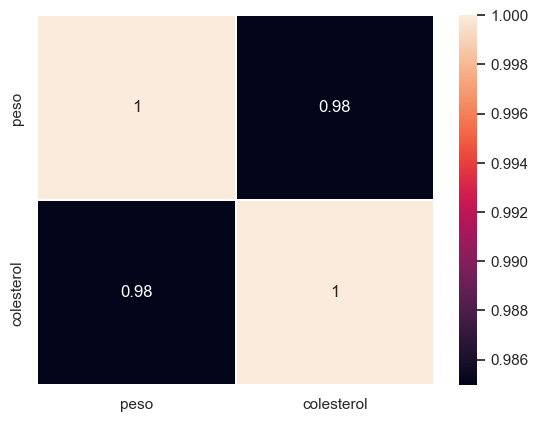

In [257]:
correlation = base_colesterol_peso.corr()

# Plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True,  linewidths=.3)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que aumenta o peso, o nível de colesterol também aumenta. 
Além disso, podemos dizer que em 99% do nível de colesterol pode ser explicado pela peso da pessoa (seja masculino ou feminino).

#Tratando os dados para o modelo Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada. 

In [258]:
# Vizualiar o formato da variável
X_colesterol_peso.shape # 

(547,)

In [259]:
# visualizando variável
# O resultado mostra que temos uma array com apenas uma coluna/dimensão. 
# No entanto, precisamos ter uma matriz com 2 colunas
X_colesterol_peso 



array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.16,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.16, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [260]:
X_colesterol_peso = X_colesterol_peso.reshape(-1,1)
X_colesterol_peso

array([[102.  ],
       [115.  ],
       [115.  ],
       [140.  ],
       [130.  ],
       [198.  ],
       [114.  ],
       [145.  ],
       [191.  ],
       [186.  ],
       [104.  ],
       [188.  ],
       [ 96.  ],
       [156.  ],
       [125.  ],
       [178.  ],
       [109.  ],
       [168.  ],
       [152.  ],
       [133.  ],
       [153.  ],
       [107.  ],
       [199.  ],
       [140.  ],
       [ 95.  ],
       [183.  ],
       [108.  ],
       [190.  ],
       [174.  ],
       [149.  ],
       [169.  ],
       [138.  ],
       [151.  ],
       [109.  ],
       [178.  ],
       [106.  ],
       [195.  ],
       [ 96.  ],
       [129.  ],
       [166.  ],
       [197.  ],
       [148.  ],
       [117.  ],
       [193.  ],
       [170.  ],
       [130.  ],
       [183.  ],
       [134.  ],
       [128.  ],
       [105.  ],
       [115.  ],
       [166.  ],
       [183.  ],
       [149.  ],
       [110.  ],
       [164.  ],
       [157.  ],
       [170.  ],
       [124.  

In [261]:
# Agora nós temos uma matriz com duas colunas. 590 linhas e uma coluna
X_colesterol_peso.shape 

(547, 1)

# Aplicando os dados ao algoritmo de machine de regressão

In [262]:
from sklearn.linear_model import LinearRegression

# cria um objeto do tipo regressão linear
previsao_colesterol_peso = LinearRegression()

In [263]:
type(previsao_colesterol_peso)

sklearn.linear_model._base.LinearRegression

# Realizando o Treinamento do modelo

In [264]:
previsao_colesterol_peso.fit(X_colesterol_peso, y_colesterol_peso)

LinearRegression()

In [266]:
# Verfificando a interceptação  
previsao_colesterol_peso.intercept_


-9.751008392436944

In [267]:
#Verificando o coeficiente angular da reta
previsao_colesterol_peso.coef_

array([1.2561789])

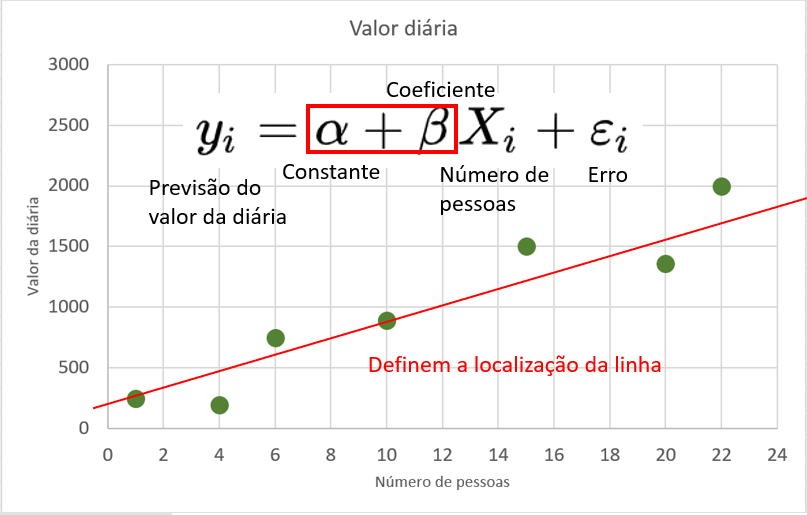

In [268]:
# Baseado nos valores de nº de pessoas, vamos estimar/prever o nível de colesterol
previsao_colesterol = previsao_colesterol_peso.predict(X_colesterol_peso)

In [269]:
# Visualiza das previsões para cada nª de pessoas
previsao_colesterol

array([118.37923961, 134.70956533, 134.70956533, 166.11403788,
       153.55224886, 238.9724142 , 133.45338643, 172.39493239,
       230.17916188, 223.89826737, 120.89159741, 226.41062518,
       110.8421662 , 186.21290031, 147.27135435, 213.84883616,
       127.17249192, 201.28704714, 181.18818471, 157.32078557,
       182.44436361, 124.66013412, 240.2285931 , 166.11403788,
       109.58598729, 220.12973067, 125.91631302, 228.92298298,
       208.82412055, 177.419648  , 202.54322604, 163.60168008,
       179.9320058 , 127.17249192, 213.84883616, 123.40395521,
       235.20387749, 110.8421662 , 152.29606996, 198.77468933,
       237.71623529, 176.1634691 , 137.22192314, 232.69151969,
       203.79940494, 153.55224886, 220.12973067, 158.57696447,
       151.03989106, 122.14777631, 134.70956533, 198.77468933,
       220.12973067, 177.419648  , 128.42867082, 196.26233153,
       187.46907921, 203.79940494, 146.01517545, 172.39493239,
       132.19720753, 178.6758269 , 115.8668818 , 170.08

# Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [270]:
# Verificando tipo da variável X_custo_diaria
X_colesterol_peso

array([[102.  ],
       [115.  ],
       [115.  ],
       [140.  ],
       [130.  ],
       [198.  ],
       [114.  ],
       [145.  ],
       [191.  ],
       [186.  ],
       [104.  ],
       [188.  ],
       [ 96.  ],
       [156.  ],
       [125.  ],
       [178.  ],
       [109.  ],
       [168.  ],
       [152.  ],
       [133.  ],
       [153.  ],
       [107.  ],
       [199.  ],
       [140.  ],
       [ 95.  ],
       [183.  ],
       [108.  ],
       [190.  ],
       [174.  ],
       [149.  ],
       [169.  ],
       [138.  ],
       [151.  ],
       [109.  ],
       [178.  ],
       [106.  ],
       [195.  ],
       [ 96.  ],
       [129.  ],
       [166.  ],
       [197.  ],
       [148.  ],
       [117.  ],
       [193.  ],
       [170.  ],
       [130.  ],
       [183.  ],
       [134.  ],
       [128.  ],
       [105.  ],
       [115.  ],
       [166.  ],
       [183.  ],
       [149.  ],
       [110.  ],
       [164.  ],
       [157.  ],
       [170.  ],
       [124.  

In [271]:
# Transforma em um vetor
X_colesterol_peso.ravel() 

array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.16,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.16, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [272]:
y_colesterol_peso

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

In [273]:
grafico = px.scatter(x = X_colesterol_peso.ravel(), y = y_colesterol_peso)
grafico.show()

In [274]:
grafico = px.scatter(x = X_colesterol_peso.ravel(), y = y_colesterol_peso)
grafico.add_scatter(x = X_colesterol_peso.ravel(), y = previsao_colesterol, name= 'previsões')
grafico.show()

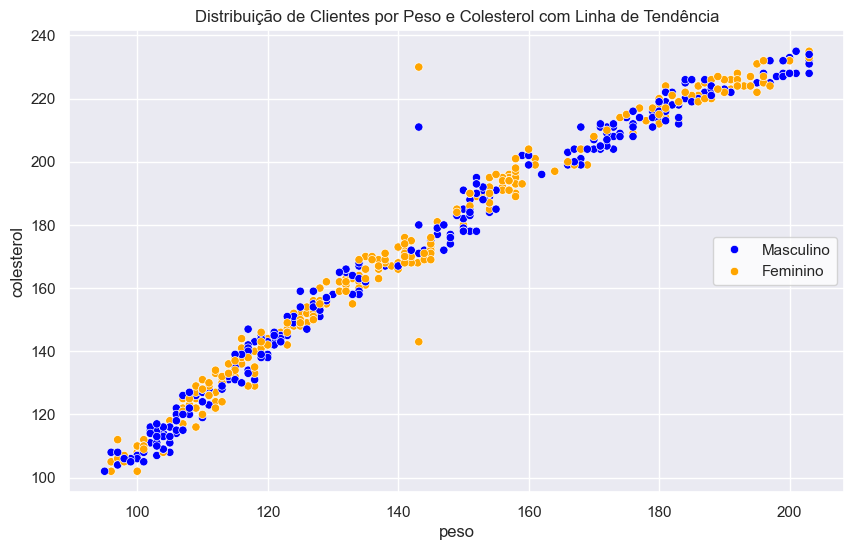

In [275]:
# Criando Scatter Plot
sns.set(style='darkgrid')    # Ajuste opcional para um fundo branco com linhas de grade
plt.figure(figsize=(10, 6))  # Ajuste opcional para o tamanho do gráfico
 
# Cria um DataFrame a partir do array NumPy
df = pd.DataFrame(data=df, columns=['peso', 'colesterol', 'genero'])


# Scatter Plot com legenda na parte superior direita e cores personalizadas
scatter_plot = sns.scatterplot(data=df, 
                               x='peso', 
                               y='colesterol', 
                               hue='genero', 
                               palette={'Masculino': 'blue', 
                                        'Feminino': 'orange'
                                        })
 
# Adicionando legenda na parte superior direita com fundo branco
scatter_plot.legend(loc='center right', facecolor='white')
 
# Nomeando o gráfico
plt.title('Distribuição de Clientes por Peso e Colesterol com Linha de Tendência')
 
# Exibindo o gráfico
plt.show()

In [276]:
# Verificando os valores de um determinada previsão baseada no peso de uma pessoa
peso = 95
previsao_colesterol_peso.intercept_ + previsao_colesterol_peso.coef_ * peso

array([109.58598729])

In [277]:
peso = 220
previsao_colesterol_peso.intercept_ + previsao_colesterol_peso.coef_ * peso

array([266.60835004])

In [278]:
# Verificando de modo direto
previsao_colesterol_peso.predict([[115]]) 

array([134.70956533])

In [279]:
# Indica a qualidade do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_colesterol_peso.score(X_colesterol_peso, y_colesterol_peso)

0.9701687683226481

In [280]:
# Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_colesterol_peso, previsao_colesterol)

In [281]:
MSE

45.63285769890677

In [282]:
#Calculando MAE 
mean_absolute_error(y_colesterol_peso, previsao_colesterol)

4.982918135475773

In [283]:
# Calculando RMSE
np.sqrt(MSE)

6.755209670980373